# PACKAGE IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error

# TensorFlow:
import tensorflow as tf
from tensorflow import keras
#import tensorflow.keras.layers as tfl
#from tensorflow.python.framework import ops

2024-02-02 17:46:32.853070: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 17:46:32.892658: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 17:46:32.893316: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 17:46:33.615548: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# DATA LOADING AND INSPECTION

In [2]:
df0 = pd.read_csv('https://raw.githubusercontent.com/dashnisan/ml_diverse_projects/master/pca_egyptian_mummies/Egypt_male_female_VC16_landmarks_after_GLS.csv', header=0)

In [3]:
df0.head(10)

,Id,sex,site,Glabella x,Glabella y,Glabella z,Nasion x,Nasion y,Nasion z,Nasospinale x,...,Frontomalare orb. L z,Infraorbital Foramen L x,Infraorbital Foramen L y,Infraorbital Foramen L z,Zygomaxillare L x,Zygomaxillare L y,Zygomaxillare L z,Alare L x,Alare L y,Alare L z
0,AMMUtu1326Mbw,male,Fayum,0.0,-0.236586,0.078592,0.0,-0.187683,0.058885,0.0,...,-0.054586,-0.195637,0.077293,-0.027227,-0.318761,0.144593,-0.091283,-0.084331,0.101164,0.031078
1,AMMUtu1327Mbw,male,Fayum,0.0,-0.235210,0.076149,0.0,-0.187328,0.059229,0.0,...,-0.060245,-0.213250,0.087883,-0.038633,-0.315866,0.118564,-0.079681,-0.088645,0.099512,0.032732
2,AMMUtu1328Mbw,male,Fayum,0.0,-0.255971,0.077618,0.0,-0.209527,0.066068,0.0,...,-0.060742,-0.166024,0.078591,-0.033406,-0.320319,0.126858,-0.089593,-0.080500,0.112969,0.043897
3,AMMUtu1330Mbw,male,Fayum,0.0,-0.253495,0.076734,0.0,-0.204810,0.057481,0.0,...,-0.056991,-0.176241,0.079067,-0.028634,-0.328532,0.146017,-0.088129,-0.084797,0.118465,0.035621
4,AMMUtu1332Mbw,male,Fayum,0.0,-0.242189,0.083591,0.0,-0.200325,0.074524,0.0,...,-0.060314,-0.180477,0.083270,-0.057143,-0.329916,0.146619,-0.086448,-0.101245,0.102616,0.032801
5,AMMUtu1335Mbw,male,Fayum,0.0,-0.226801,0.083147,0.0,-0.185245,0.070902,0.0,...,-0.067639,-0.191722,0.063384,-0.024582,-0.328336,0.129761,-0.101629,-0.091311,0.097133,0.034444
6,AMMUtu1336Mbw,male,Fayum,0.0,-0.217240,0.076642,0.0,-0.181146,0.061178,0.0,...,-0.066035,-0.180722,0.064279,-0.027401,-0.330041,0.121258,-0.110528,-0.086191,0.116957,0.044346
7,AMMUtu1341Mbw,male,Fayum,0.0,-0.239825,0.066503,0.0,-0.189031,0.053908,0.0,...,-0.049686,-0.195836,0.058584,-0.013851,-0.327207,0.126482,-0.082426,-0.085845,0.098179,0.027655
8,AMMUtu1342Mbw,male,Fayum,0.0,-0.249506,0.077299,0.0,-0.186789,0.060249,0.0,...,-0.056017,-0.174098,0.059465,-0.025175,-0.318792,0.132074,-0.095066,-0.098184,0.102632,0.045311
9,AMMUtu1343Mbw,male,Fayum,0.0,-0.244968,0.094266,0.0,-0.198238,0.074444,0.0,...,-0.062080,-0.180053,0.067090,-0.036454,-0.335308,0.124128,-0.093630,-0.085504,0.097346,0.038974


In [4]:
df0.columns

Index(['Id', 'sex', 'site', 'Glabella x', 'Glabella y', 'Glabella z',
       'Nasion x', 'Nasion y', 'Nasion z', 'Nasospinale x', 'Nasospinale y',
       'Nasospinale z', 'Prosthion x', 'Prosthion y', 'Prosthion z',
       'Dacryon right x', 'Dacryon right y', 'Dacryon right z',
       'Zygoorbitale right x', 'Zygoorbitale right y', 'Zygoorbitale right z',
       'Frontomalare orb. R x', 'Frontomalare orb. R y',
       'Frontomalare orb. R z', 'Infraorbital Foramen R x',
       'Infraorbital Foramen R y', 'Infraorbital Foramen R z',
       'Zygomaxillare R x', 'Zygomaxillare R y', 'Zygomaxillare R z',
       'Alare R x', 'Alare R y', 'Alare R z', 'Dacryon L x', 'Dacryon L y',
       ' Dacryon L z', 'Zygoorbitale L x', 'Zygoorbitale L y',
       'Zygoorbitale L z', 'Frontomalare orb. L x', 'Frontomalare orb. L y',
       'Frontomalare orb. L z', 'Infraorbital Foramen L x',
       'Infraorbital Foramen L y', 'Infraorbital Foramen L z',
       'Zygomaxillare L x', 'Zygomaxillare L y', 'Zy

In [5]:
df0.shape

(400, 51)

In [6]:
df0.info

<bound method DataFrame.info of                 Id     sex    site  Glabella x  Glabella y  Glabella z  \
0    AMMUtu1326Mbw    male   Fayum         0.0   -0.236586    0.078592   
1    AMMUtu1327Mbw    male   Fayum         0.0   -0.235210    0.076149   
2    AMMUtu1328Mbw    male   Fayum         0.0   -0.255971    0.077618   
3    AMMUtu1330Mbw    male   Fayum         0.0   -0.253495    0.076734   
4    AMMUtu1332Mbw    male   Fayum         0.0   -0.242189    0.083591   
..             ...     ...     ...         ...         ...         ...   
395  NuCk266_76Wbw  female  Nubien         0.0   -0.235933    0.093630   
396   NuCk270_1Wbw  female  Nubien         0.0   -0.268579    0.077941   
397  NuCk270_21Wbw  female  Nubien         0.0   -0.246575    0.073929   
398  NuCk270_27Wbw  female  Nubien         0.0   -0.264776    0.075019   
399  NuCk266_81Wbw  female  Nubien         0.0   -0.270544    0.088078   

     Nasion x  Nasion y  Nasion z  Nasospinale x  ...  Frontomalare orb. L z  \

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        400 non-null    object 
 1   sex                       400 non-null    object 
 2   site                      400 non-null    object 
 3   Glabella x                400 non-null    float64
 4   Glabella y                400 non-null    float64
 5   Glabella z                400 non-null    float64
 6   Nasion x                  400 non-null    float64
 7   Nasion y                  400 non-null    float64
 8   Nasion z                  400 non-null    float64
 9   Nasospinale x             400 non-null    float64
 10  Nasospinale y             400 non-null    float64
 11  Nasospinale z             400 non-null    float64
 12  Prosthion x               400 non-null    float64
 13  Prosthion y               400 non-null    float64
 14  Prosthion 

In [8]:
df0.describe()

,Glabella x,Glabella y,Glabella z,Nasion x,Nasion y,Nasion z,Nasospinale x,Nasospinale y,Nasospinale z,Prosthion x,...,Frontomalare orb. L z,Infraorbital Foramen L x,Infraorbital Foramen L y,Infraorbital Foramen L z,Zygomaxillare L x,Zygomaxillare L y,Zygomaxillare L z,Alare L x,Alare L y,Alare L z
count,400.0,400.000000,400.000000,400.0,400.000000,400.000000,400.0,400.000000,400.000000,400.0,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.0,-0.243280,0.079053,0.0,-0.189039,0.065133,0.0,0.160963,0.075083,0.0,...,-0.059350,-0.189792,0.071177,-0.030220,-0.327273,0.127667,-0.092898,-0.090177,0.099562,0.035225
std,0.0,0.012782,0.009528,0.0,0.011169,0.008005,0.0,0.015159,0.012818,0.0,...,0.009158,0.010451,0.008798,0.009078,0.010792,0.012294,0.011678,0.006418,0.011459,0.007410
min,0.0,-0.287800,0.054473,0.0,-0.221598,0.041031,0.0,0.114794,0.030247,0.0,...,-0.086892,-0.224100,0.039972,-0.063781,-0.377159,0.091794,-0.134422,-0.113237,0.035912,0.010713
25%,0.0,-0.251135,0.072368,0.0,-0.196260,0.059499,0.0,0.151191,0.066626,0.0,...,-0.065349,-0.196500,0.065713,-0.036057,-0.335284,0.119381,-0.100462,-0.094074,0.093289,0.030381
50%,0.0,-0.243627,0.079160,0.0,-0.189632,0.065070,0.0,0.160993,0.074817,0.0,...,-0.060143,-0.189594,0.071395,-0.029806,-0.327234,0.128305,-0.093030,-0.089700,0.100652,0.034723
75%,0.0,-0.234407,0.085513,0.0,-0.182075,0.071158,0.0,0.170932,0.084442,0.0,...,-0.052229,-0.182224,0.076999,-0.023187,-0.318945,0.135879,-0.085943,-0.086003,0.106597,0.039841
max,0.0,-0.210211,0.106638,0.0,-0.150303,0.087772,0.0,0.204360,0.109876,0.0,...,-0.032825,-0.157969,0.096020,-0.009436,-0.301562,0.169047,-0.050662,-0.073326,0.138120,0.066376


# EDA: EXPLORATORY DATA ANALYSIS

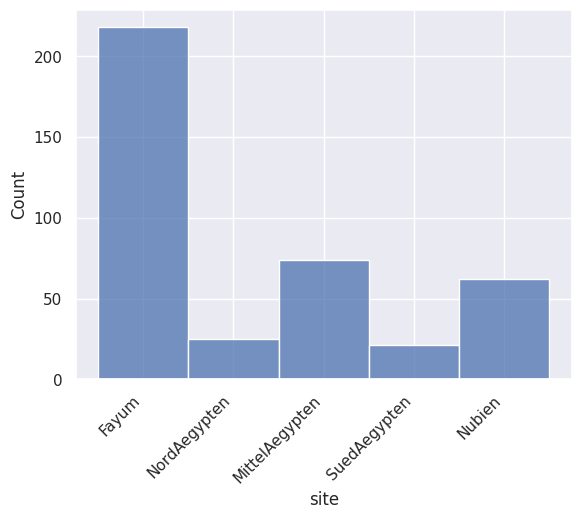

In [9]:
sns.set()
sns.histplot(data=df0, x='site')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

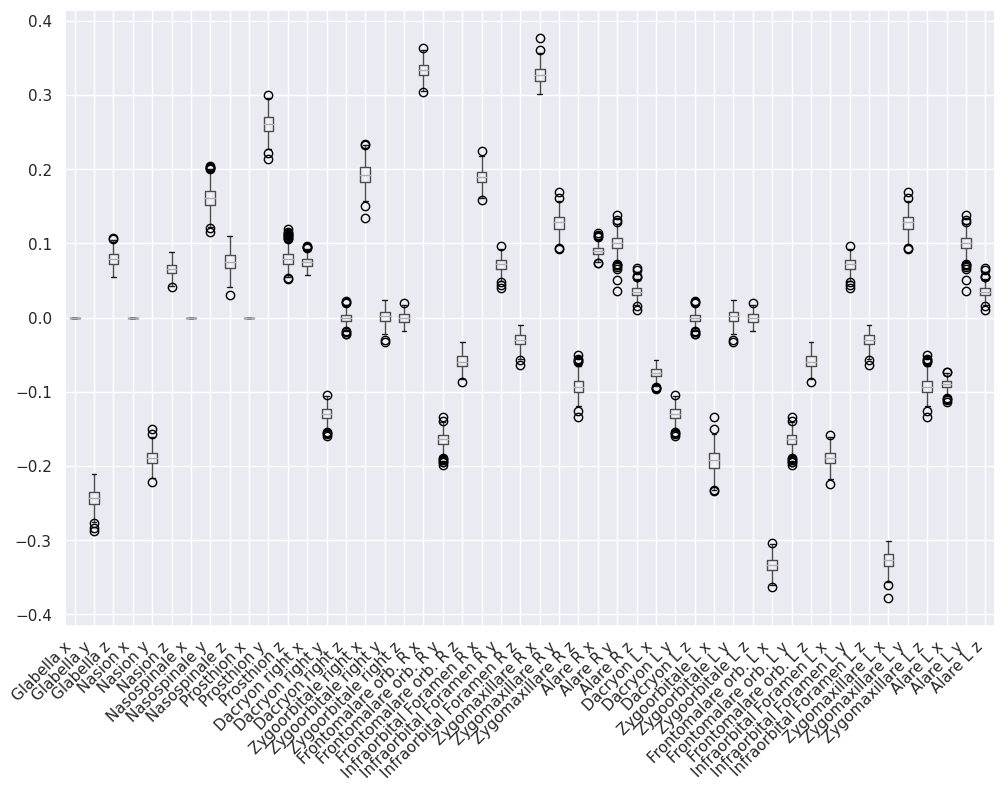

In [10]:
df0.boxplot(figsize=(12,8))
plt.xticks(rotation=45, horizontalalignment='right')
plt.yscale('linear')

In [11]:
df0.columns[3:51]

Index(['Glabella x', 'Glabella y', 'Glabella z', 'Nasion x', 'Nasion y',
       'Nasion z', 'Nasospinale x', 'Nasospinale y', 'Nasospinale z',
       'Prosthion x', 'Prosthion y', 'Prosthion z', 'Dacryon right x',
       'Dacryon right y', 'Dacryon right z', 'Zygoorbitale right x',
       'Zygoorbitale right y', 'Zygoorbitale right z', 'Frontomalare orb. R x',
       'Frontomalare orb. R y', 'Frontomalare orb. R z',
       'Infraorbital Foramen R x', 'Infraorbital Foramen R y',
       'Infraorbital Foramen R z', 'Zygomaxillare R x', 'Zygomaxillare R y',
       'Zygomaxillare R z', 'Alare R x', 'Alare R y', 'Alare R z',
       'Dacryon L x', 'Dacryon L y', ' Dacryon L z', 'Zygoorbitale L x',
       'Zygoorbitale L y', 'Zygoorbitale L z', 'Frontomalare orb. L x',
       'Frontomalare orb. L y', 'Frontomalare orb. L z',
       'Infraorbital Foramen L x', 'Infraorbital Foramen L y',
       'Infraorbital Foramen L z', 'Zygomaxillare L x', 'Zygomaxillare L y',
       'Zygomaxillare L z', 'Al

## NaNs

In [12]:
dfnans = pd.DataFrame(df0.isna().sum())
#dfnan = dfnans.T
dfnans.columns=['nan_count']


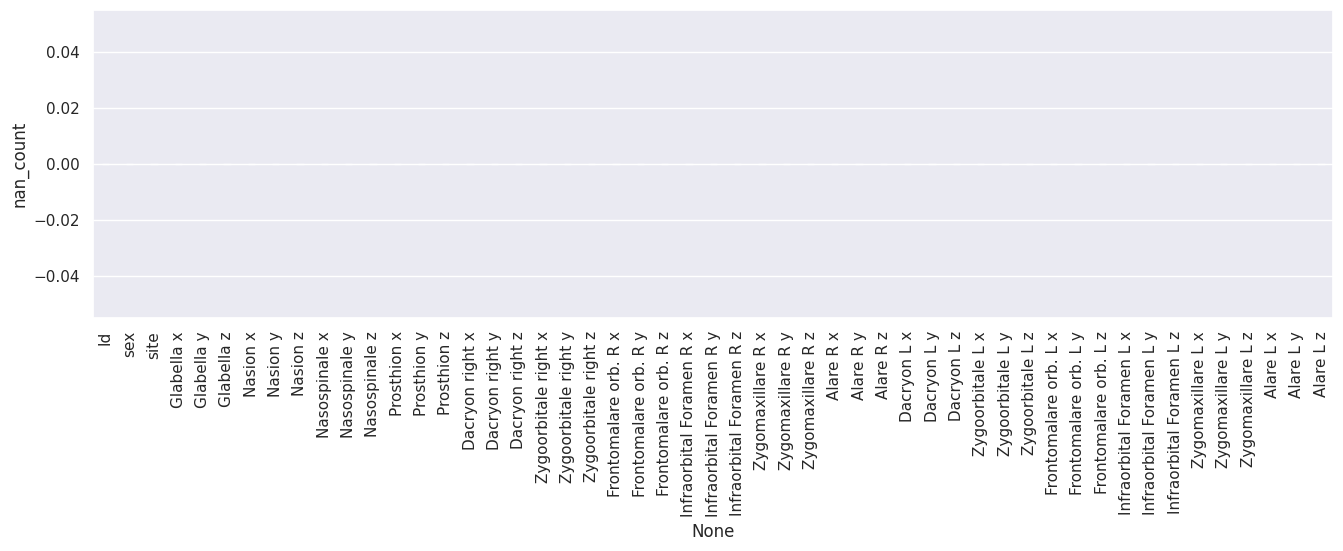

In [13]:
plt.figure(figsize=(16,4))
sns.barplot( x=dfnans.index, y=dfnans['nan_count'], width=0.3)
plt.xticks(rotation=90)
plt.show()

### Get rid of NaNs for PCA

In [14]:
getrid_nans = False
if getrid_nans == True:
    df0.dropna(axis=0, inplace=True)
    df0.reset_index()
    df0.isna().sum()

## Gender Segregation

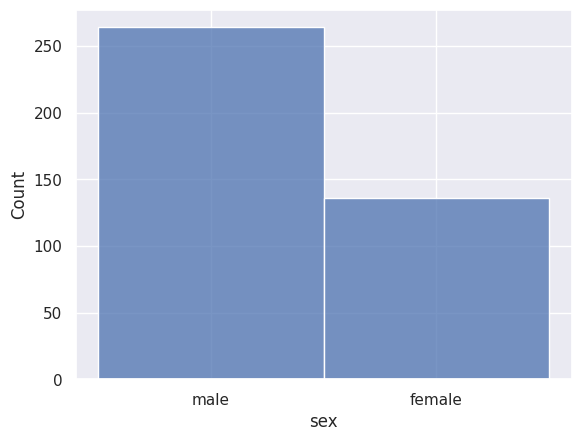

In [15]:
sns.histplot(data=df0, x='sex')
plt.xticks(rotation=0, horizontalalignment='center')
plt.show()

In [16]:
mask = df0['sex'] == 'male'
dfm = df0[mask]

mask = df0['sex'] == 'female'
dfw = df0[mask]

In [17]:
dfm.shape

(264, 51)

In [18]:
dfw.shape

(136, 51)

## Generate Data Frame with Only Landmarks Cordinates

In [19]:
df0.shape

(400, 51)

In [20]:
dfcoor_m = dfm.iloc[:, 3:51]
dfcoor_w = dfw.iloc[:, 3:51]
dfcoor_m.head()

,Glabella x,Glabella y,Glabella z,Nasion x,Nasion y,Nasion z,Nasospinale x,Nasospinale y,Nasospinale z,Prosthion x,...,Frontomalare orb. L z,Infraorbital Foramen L x,Infraorbital Foramen L y,Infraorbital Foramen L z,Zygomaxillare L x,Zygomaxillare L y,Zygomaxillare L z,Alare L x,Alare L y,Alare L z
0,0.0,-0.236586,0.078592,0.0,-0.187683,0.058885,0.0,0.190715,0.074790,0.0,...,-0.054586,-0.195637,0.077293,-0.027227,-0.318761,0.144593,-0.091283,-0.084331,0.101164,0.031078
1,0.0,-0.235210,0.076149,0.0,-0.187328,0.059229,0.0,0.179330,0.079729,0.0,...,-0.060245,-0.213250,0.087883,-0.038633,-0.315866,0.118564,-0.079681,-0.088645,0.099512,0.032732
2,0.0,-0.255971,0.077618,0.0,-0.209527,0.066068,0.0,0.173910,0.081668,0.0,...,-0.060742,-0.166024,0.078591,-0.033406,-0.320319,0.126858,-0.089593,-0.080500,0.112969,0.043897
3,0.0,-0.253495,0.076734,0.0,-0.204810,0.057481,0.0,0.177561,0.083288,0.0,...,-0.056991,-0.176241,0.079067,-0.028634,-0.328532,0.146017,-0.088129,-0.084797,0.118465,0.035621
4,0.0,-0.242189,0.083591,0.0,-0.200325,0.074524,0.0,0.153868,0.079373,0.0,...,-0.060314,-0.180477,0.083270,-0.057143,-0.329916,0.146619,-0.086448,-0.101245,0.102616,0.032801


In [21]:
dfcoor_m.shape

(264, 48)

# PCA: 
# Classical analytical calculation of eigenvalues and eigenvectors of the new components
### This sklearn algorithm does not allow NaN values

## MALES: Separate and analyze data for skulls labeled as males

In [22]:
dimred = PCA(n_components=22, random_state=44)
x_reduced = dimred.fit_transform(dfcoor_m)

In [23]:
print(dimred.n_features_in_)
print(dimred.n_components_)

48
22


In [24]:
dimred.singular_values_

array([0.4774146 , 0.39390886, 0.3487718 , 0.32583402, 0.27793255,
       0.25556711, 0.24475974, 0.2232789 , 0.2058619 , 0.19337901,
       0.18718325, 0.17661449, 0.15945731, 0.15680642, 0.14619621,
       0.13647497, 0.13379692, 0.12410338, 0.11488189, 0.10416188,
       0.09276209, 0.0717879 ])

## By looking at the eigenvalues: New Components 1 and 2 are the most relevant

In [25]:
dimred.components_.shape

(22, 48)

### PCA1

In [26]:
dimred.components_[0].shape

(48,)

In [27]:
dimred.components_[0]

array([-3.47856559e-18,  1.62404083e-01,  1.42006982e-01, -0.00000000e+00,
        1.79755123e-01,  6.37949815e-02, -0.00000000e+00, -3.80051755e-01,
       -9.69399439e-02,  1.35525272e-20, -2.94346933e-01,  1.16100399e-01,
        1.20315568e-01,  1.70733920e-01,  2.75117267e-02,  3.44501560e-01,
        1.12423711e-01,  2.91414171e-03,  1.48482673e-01,  1.69464756e-01,
       -4.66947785e-03,  1.82372760e-01, -6.98695982e-02, -8.33235226e-02,
        1.98866278e-02, -2.20678353e-03,  9.29890474e-03,  9.68942535e-02,
       -2.14426264e-01, -6.42129818e-02, -1.20315568e-01,  1.70733920e-01,
        2.75117267e-02, -3.44501560e-01,  1.12423711e-01,  2.91414171e-03,
       -1.48482673e-01,  1.69464756e-01, -4.66947785e-03, -1.82372760e-01,
       -6.98695982e-02, -8.33235226e-02, -1.98866278e-02, -2.20678353e-03,
        9.29890474e-03, -9.68942535e-02, -2.14426264e-01, -6.42129818e-02])

In [28]:
pca1 = pd.DataFrame(dimred.components_[0])
pca1.columns=['coeff']

In [29]:
pca1.head(10).T

,0,1,2,3,4,5,6,7,8,9
coeff,-3.478566e-18,0.162404,0.142007,-0.0,0.179755,0.063795,-0.0,-0.380052,-0.09694,1.355253e-20


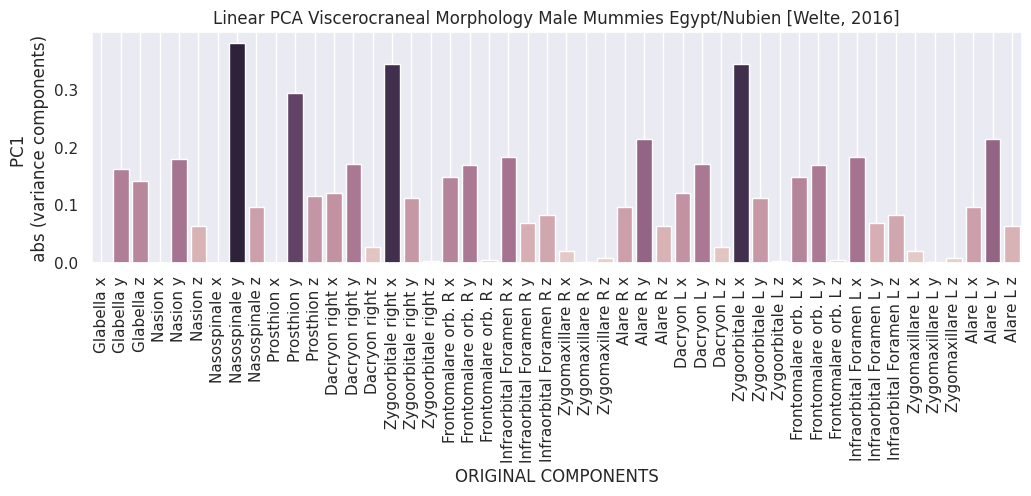

In [30]:
plt.figure(figsize=(12,3))
#sns.barplot(x=pca1.index+1, y=pca1['comp'])
sns.barplot(x=dfcoor_m.columns, y=pca1['coeff'].abs(), hue=pca1['coeff'].abs(), legend=False)

plt.xticks(rotation=90)
plt.xlabel('ORIGINAL COMPONENTS')
plt.ylabel('PC1 \n abs (variance components) ')
plt.title('Linear PCA Viscerocraneal Morphology Male Mummies Egypt/Nubien [Welte, 2016]')
plt.grid()
plt.show()

In [31]:
landmks_x = []
landmks_y = []
landmks_z = []
for i in range (0,16): 
    #print(3*i+1)
    landmks_x.append(3*i)
    landmks_y.append(3*i+1)
    landmks_z.append(3*i+2)

print(landmks_x)
print(landmks_y)
print(landmks_z)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46]
[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47]


In [32]:
x = np.array(pca1.iloc[landmks_x]).T
y = np.array(pca1.iloc[landmks_y]).T   
z = np.array(pca1.iloc[landmks_z]).T


In [33]:
pca1_landmks_xyz = np.zeros(shape=(3,16))
pca1_landmks_xyz[0,:] = x
pca1_landmks_xyz[1,:] = y
pca1_landmks_xyz[2,:] = z

In [34]:
dfcoor_m.columns

Index(['Glabella x', 'Glabella y', 'Glabella z', 'Nasion x', 'Nasion y',
       'Nasion z', 'Nasospinale x', 'Nasospinale y', 'Nasospinale z',
       'Prosthion x', 'Prosthion y', 'Prosthion z', 'Dacryon right x',
       'Dacryon right y', 'Dacryon right z', 'Zygoorbitale right x',
       'Zygoorbitale right y', 'Zygoorbitale right z', 'Frontomalare orb. R x',
       'Frontomalare orb. R y', 'Frontomalare orb. R z',
       'Infraorbital Foramen R x', 'Infraorbital Foramen R y',
       'Infraorbital Foramen R z', 'Zygomaxillare R x', 'Zygomaxillare R y',
       'Zygomaxillare R z', 'Alare R x', 'Alare R y', 'Alare R z',
       'Dacryon L x', 'Dacryon L y', ' Dacryon L z', 'Zygoorbitale L x',
       'Zygoorbitale L y', 'Zygoorbitale L z', 'Frontomalare orb. L x',
       'Frontomalare orb. L y', 'Frontomalare orb. L z',
       'Infraorbital Foramen L x', 'Infraorbital Foramen L y',
       'Infraorbital Foramen L z', 'Zygomaxillare L x', 'Zygomaxillare L y',
       'Zygomaxillare L z', 'Al

In [35]:
landmks_names = pd.Series(dfcoor_m.columns)
landmks_names

0                   Glabella x
1                   Glabella y
2                   Glabella z
3                     Nasion x
4                     Nasion y
5                     Nasion z
6                Nasospinale x
7                Nasospinale y
8                Nasospinale z
9                  Prosthion x
10                 Prosthion y
11                 Prosthion z
12             Dacryon right x
13             Dacryon right y
14             Dacryon right z
15        Zygoorbitale right x
16        Zygoorbitale right y
17        Zygoorbitale right z
18       Frontomalare orb. R x
19       Frontomalare orb. R y
20       Frontomalare orb. R z
21    Infraorbital Foramen R x
22    Infraorbital Foramen R y
23    Infraorbital Foramen R z
24           Zygomaxillare R x
25           Zygomaxillare R y
26           Zygomaxillare R z
27                   Alare R x
28                   Alare R y
29                   Alare R z
30                 Dacryon L x
31                 Dacryon L y
32      

In [36]:
landmks_names = landmks_names.str.replace(pat='\s[x,y]$', repl='', regex=True)
templist = []
for i in range (0,16): 
    templist.append(landmks_names[3*i])
templist
landmks_names = templist
landmks_names

['Glabella',
 'Nasion',
 'Nasospinale',
 'Prosthion',
 'Dacryon right',
 'Zygoorbitale right',
 'Frontomalare orb. R',
 'Infraorbital Foramen R',
 'Zygomaxillare R',
 'Alare R',
 'Dacryon L',
 'Zygoorbitale L',
 'Frontomalare orb. L',
 'Infraorbital Foramen L',
 'Zygomaxillare L',
 'Alare L']

In [37]:
pca1_landmks_xyz = pd.DataFrame(data=pca1_landmks_xyz)
pca1_landmks_xyz.columns = landmks_names
pca1_landmks_xyz

,Glabella,Nasion,Nasospinale,Prosthion,Dacryon right,Zygoorbitale right,Frontomalare orb. R,Infraorbital Foramen R,Zygomaxillare R,Alare R,Dacryon L,Zygoorbitale L,Frontomalare orb. L,Infraorbital Foramen L,Zygomaxillare L,Alare L
0,-3.478566e-18,-0.000000,-0.000000,1.355253e-20,0.120316,0.344502,0.148483,0.182373,0.019887,0.096894,-0.120316,-0.344502,-0.148483,-0.182373,-0.019887,-0.096894
1,1.624041e-01,0.179755,-0.380052,-2.943469e-01,0.170734,0.112424,0.169465,-0.069870,-0.002207,-0.214426,0.170734,0.112424,0.169465,-0.069870,-0.002207,-0.214426
2,1.420070e-01,0.063795,-0.096940,1.161004e-01,0.027512,0.002914,-0.004669,-0.083324,0.009299,-0.064213,0.027512,0.002914,-0.004669,-0.083324,0.009299,-0.064213


#### Squared sum of components x,y,z for each landmark:

In [38]:
pca1_sqsumcoef = pd.DataFrame(np.square(pca1_landmks_xyz.sum(axis=0)))
pca1_sqsumcoef.columns = ['sq(sum(xyz))']
pca1_sqsumcoef

,sq(sum(xyz))
Glabella,0.092666
Nasion,0.059317
Nasospinale,0.227521
Prosthion,0.031772
Dacryon right,0.101481
Zygoorbitale right,0.211452
Frontomalare orb. R,0.098143
Infraorbital Foramen R,0.000851
Zygomaxillare R,0.000728
Alare R,0.033031


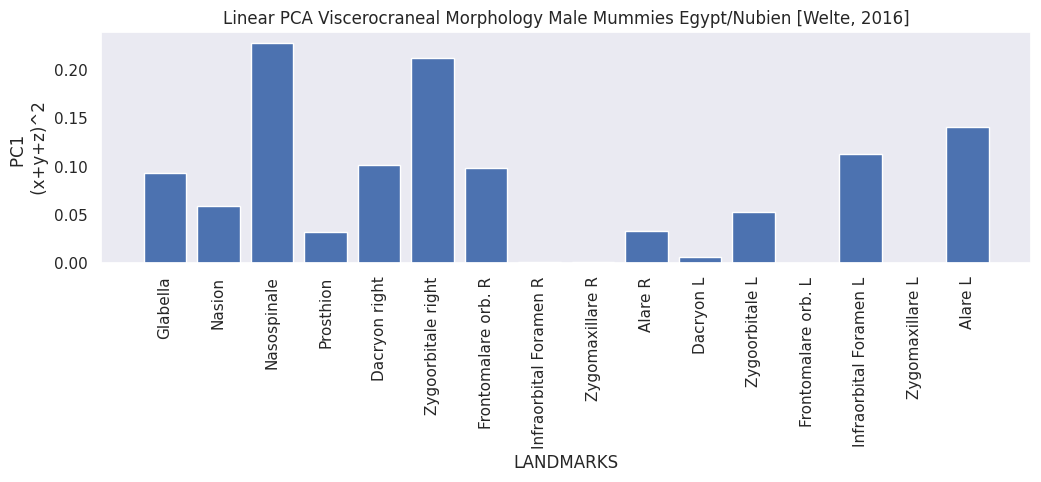

In [39]:
plt.figure(figsize=(12,3))
plt.bar(x=pca1_sqsumcoef.index, height=pca1_sqsumcoef['sq(sum(xyz))'])

plt.xticks(rotation=90)
plt.xlabel('LANDMARKS')
plt.ylabel('PC1 \n (x+y+z)^2 ')
plt.title('Linear PCA Viscerocraneal Morphology Male Mummies Egypt/Nubien [Welte, 2016]')
plt.grid()
plt.show()

### PCA2

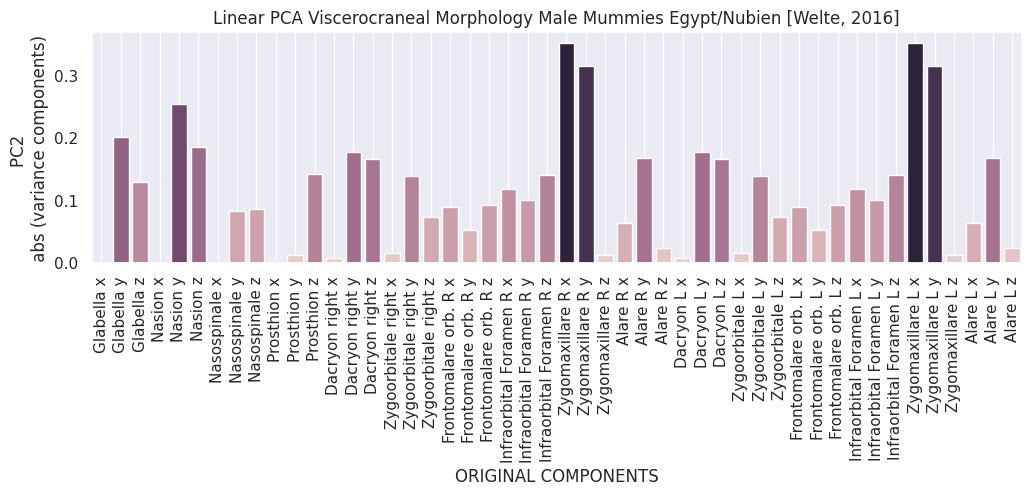

In [40]:
pca2 = pd.DataFrame(dimred.components_[1])
pca2.columns=['comp']
plt.figure(figsize=(12,3))
sns.barplot(x=dfcoor_m.columns, y=pca2['comp'].abs(), hue=pca2['comp'].abs(), legend=False)
plt.xticks(rotation=90)
plt.xlabel('ORIGINAL COMPONENTS')
plt.ylabel('PC2 \n abs (variance components) ')
plt.title('Linear PCA Viscerocraneal Morphology Male Mummies Egypt/Nubien [Welte, 2016]')
plt.grid()
plt.show()

In [41]:
dimred.explained_variance_

array([8.66633842e-04, 5.89977918e-04, 4.62516235e-04, 4.03679877e-04,
       2.93712946e-04, 2.48344285e-04, 2.27784527e-04, 1.89556910e-04,
       1.61137338e-04, 1.42187997e-04, 1.33222691e-04, 1.18603342e-04,
       9.66792157e-05, 9.34914525e-05, 8.12674172e-05, 7.08190824e-05,
       6.80669798e-05, 5.85614008e-05, 5.01819314e-05, 4.12536042e-05,
       3.27178899e-05, 1.95950665e-05])

In [42]:
dimred.explained_variance_ratio_

array([0.19474953, 0.13257955, 0.10393642, 0.09071474, 0.06600303,
       0.05580781, 0.05118763, 0.04259714, 0.0362107 , 0.03195242,
       0.02993774, 0.02665248, 0.02172571, 0.02100935, 0.01826237,
       0.01591443, 0.01529598, 0.01315989, 0.01127686, 0.00927049,
       0.00735235, 0.00440339])

In [43]:
# mean_  = X.mean(axis=0)      see sklearn doc
# so the mean of each original feature over the examples
dimred.mean_.shape

(48,)

In [44]:
dimred.mean_

array([ 0.        , -0.24258058,  0.08068432,  0.        , -0.19027139,
        0.06553361,  0.        ,  0.16147724,  0.07710387,  0.        ,
        0.25983516,  0.07962921,  0.07435007, -0.13059298, -0.0021457 ,
        0.1910183 , -0.00055163, -0.00085729,  0.33260234, -0.16333263,
       -0.06047445,  0.18990125,  0.0710673 , -0.03087487,  0.32762894,
        0.12987252, -0.09294463,  0.0896833 ,  0.09930721,  0.03582143,
       -0.07435007, -0.13059298, -0.0021457 , -0.1910183 , -0.00055163,
       -0.00085729, -0.33260234, -0.16333263, -0.06047445, -0.18990125,
        0.0710673 , -0.03087487, -0.32762894,  0.12987252, -0.09294463,
       -0.0896833 ,  0.09930721,  0.03582143])

In [45]:
dimred.noise_variance_

8.532090578843177e-34

In [46]:
dimred.singular_values_

array([0.4774146 , 0.39390886, 0.3487718 , 0.32583402, 0.27793255,
       0.25556711, 0.24475974, 0.2232789 , 0.2058619 , 0.19337901,
       0.18718325, 0.17661449, 0.15945731, 0.15680642, 0.14619621,
       0.13647497, 0.13379692, 0.12410338, 0.11488189, 0.10416188,
       0.09276209, 0.0717879 ])

# KERNEL PCA: non-linear mapping to infinite dimensional feature space and then applying linear PCA

In [47]:
kpca = KernelPCA(n_components=15, kernel='rbf', gamma=0.02, random_state=44, fit_inverse_transform=True)
X_reduced = kpca.fit_transform(dfcoor_m)
X_preimage = kpca.inverse_transform(X_reduced)

In [48]:
mean_squared_error(dfcoor_m, X_preimage)

9.262199385096624e-05

In [49]:
X_reduced.shape

(264, 15)

In [50]:
kpca.X_transformed_fit_.shape

(264, 15)

In [51]:
kpca.feature_names_in_

array(['Glabella x', 'Glabella y', 'Glabella z', 'Nasion x', 'Nasion y',
       'Nasion z', 'Nasospinale x', 'Nasospinale y', 'Nasospinale z',
       'Prosthion x', 'Prosthion y', 'Prosthion z', 'Dacryon right x',
       'Dacryon right y', 'Dacryon right z', 'Zygoorbitale right x',
       'Zygoorbitale right y', 'Zygoorbitale right z',
       'Frontomalare orb. R x', 'Frontomalare orb. R y',
       'Frontomalare orb. R z', 'Infraorbital Foramen R x',
       'Infraorbital Foramen R y', 'Infraorbital Foramen R z',
       'Zygomaxillare R x', 'Zygomaxillare R y', 'Zygomaxillare R z',
       'Alare R x', 'Alare R y', 'Alare R z', 'Dacryon L x',
       'Dacryon L y', ' Dacryon L z', 'Zygoorbitale L x',
       'Zygoorbitale L y', 'Zygoorbitale L z', 'Frontomalare orb. L x',
       'Frontomalare orb. L y', 'Frontomalare orb. L z',
       'Infraorbital Foramen L x', 'Infraorbital Foramen L y',
       'Infraorbital Foramen L z', 'Zygomaxillare L x',
       'Zygomaxillare L y', 'Zygomaxillare L 

In [52]:
kpca.eigenvectors_.shape

(264, 15)

In [53]:
kpca.X_fit_.shape

(264, 48)

In [54]:
kpca.dual_coef_.shape

(264, 48)

In [55]:
kpca.eigenvalues_.shape

(15,)

## Visualization according to 'site' groups:

In [56]:
X_site_label = pd.DataFrame(kpca.X_transformed_fit_)
X_site_label.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.005214,-0.003035,-0.004169,0.001158,0.002387,-0.002599,0.001051,-0.004984,-0.003597,0.001256,0.002386,-0.004120,-0.004427,0.000466,-0.002555
1,-0.003444,0.001151,-0.003417,0.000712,-0.002874,0.006767,0.005615,-0.004092,-0.002624,0.000258,0.003946,-0.001523,-0.002320,0.000702,-0.003704
2,-0.010615,-0.004001,0.001599,-0.002171,-0.001494,0.001872,-0.003690,0.000979,-0.000528,-0.001574,-0.000839,-0.000330,-0.001807,0.000192,-0.000690
3,-0.013762,-0.003376,-0.001787,-0.001263,0.004232,-0.000996,-0.000785,-0.001173,-0.001764,-0.002130,0.000973,-0.003658,0.000396,-0.001845,-0.000553
4,-0.001924,-0.004279,-0.009367,0.008395,0.001867,0.003518,-0.003550,-0.001256,-0.000928,-0.003478,0.000772,-0.001064,-0.001155,0.002998,0.004222


In [57]:
columns = []
for i in range (1, kpca.eigenvalues_.shape[0]+1):
    columns.append('PC'+str(i))

X_site_label.columns = columns
    

In [58]:
X_site_label.insert(0, 'site', dfm['site'])

In [59]:
X_site_label.head()

,site,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,Fayum,-0.005214,-0.003035,-0.004169,0.001158,0.002387,-0.002599,0.001051,-0.004984,-0.003597,0.001256,0.002386,-0.004120,-0.004427,0.000466,-0.002555
1,Fayum,-0.003444,0.001151,-0.003417,0.000712,-0.002874,0.006767,0.005615,-0.004092,-0.002624,0.000258,0.003946,-0.001523,-0.002320,0.000702,-0.003704
2,Fayum,-0.010615,-0.004001,0.001599,-0.002171,-0.001494,0.001872,-0.003690,0.000979,-0.000528,-0.001574,-0.000839,-0.000330,-0.001807,0.000192,-0.000690
3,Fayum,-0.013762,-0.003376,-0.001787,-0.001263,0.004232,-0.000996,-0.000785,-0.001173,-0.001764,-0.002130,0.000973,-0.003658,0.000396,-0.001845,-0.000553
4,Fayum,-0.001924,-0.004279,-0.009367,0.008395,0.001867,0.003518,-0.003550,-0.001256,-0.000928,-0.003478,0.000772,-0.001064,-0.001155,0.002998,0.004222


In [60]:
X_site_label.shape

(264, 16)

<Axes: xlabel='PC1', ylabel='PC2'>

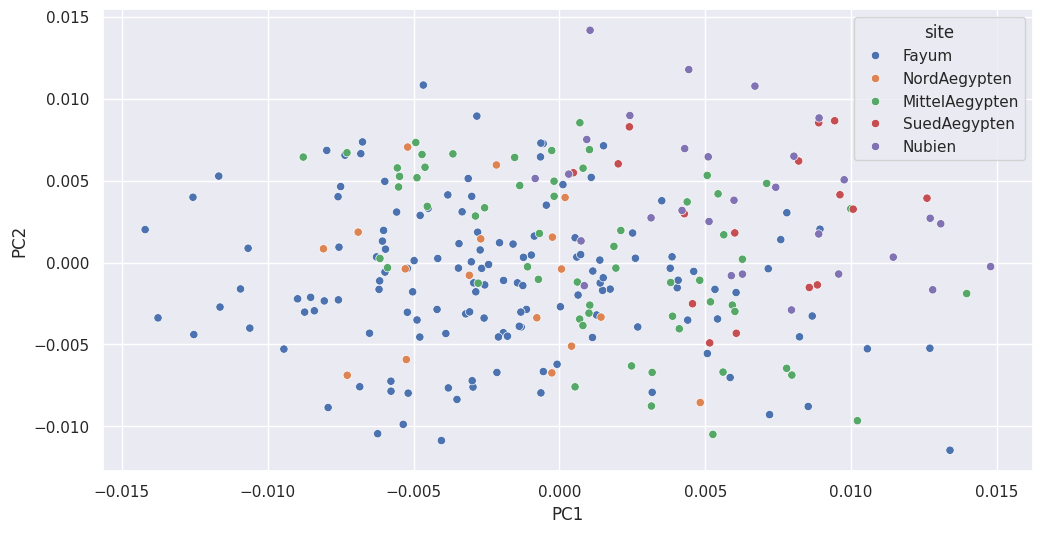

In [61]:
plt.figure(figsize=(12,6))
sns.scatterplot (data=X_site_label, x='PC1', y='PC2', hue='site' )

## 2-D Visualization t-SNE:

In [62]:
vis_dimred = TSNE
X_2d = vis_dimred(n_components=2, random_state=44).fit_transform(X_reduced)


In [63]:
X_2d.shape
#vis_dimred.embedding_

(264, 2)

In [64]:
X_tnse_site = pd.DataFrame(X_2d)
X_tnse_site.columns = ['tNSE1','tNSE2']
X_tnse_site.head()

,tNSE1,tNSE2
0,5.875590,5.794401
1,8.630655,3.420376
2,6.598032,8.972350
3,5.479415,8.650661
4,9.917680,2.190171


In [65]:
X_tnse_site.insert(0, 'site', dfm['site'])
X_tnse_site.head()

,site,tNSE1,tNSE2
0,Fayum,5.875590,5.794401
1,Fayum,8.630655,3.420376
2,Fayum,6.598032,8.972350
3,Fayum,5.479415,8.650661
4,Fayum,9.917680,2.190171


<Axes: xlabel='tNSE1', ylabel='tNSE2'>

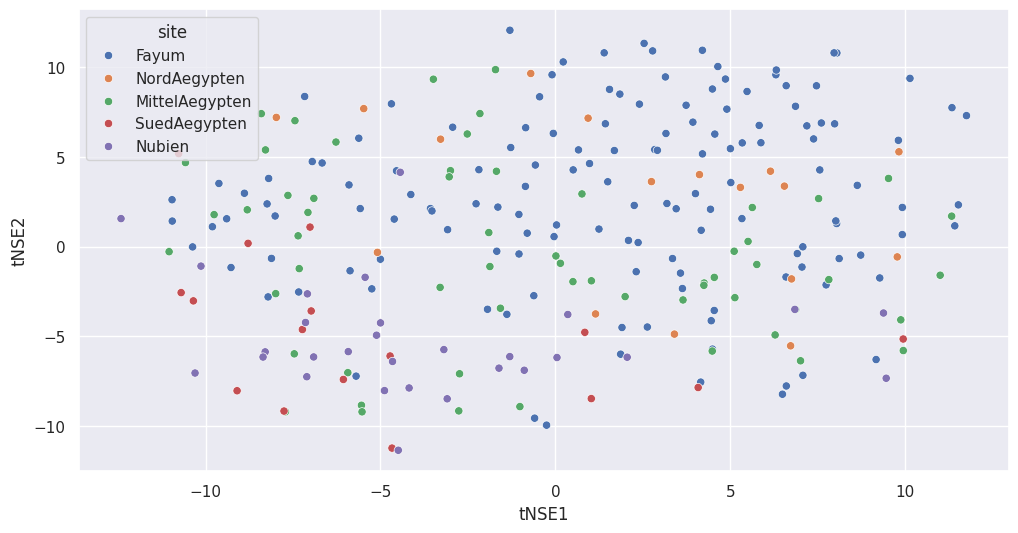

In [66]:
plt.figure(figsize=(12,6))
sns.scatterplot (data=X_tnse_site, x='tNSE1', y='tNSE2', hue='site' )

COMMENT: t-NSE does not bring much compared to visualization of first 2 components of kPCA

# AUTOENCODER: Representation learning based on neural networks: 
### A kind of "self-supervised" learning in which the labels are equal to the inputs. COnsists in one encoder part (outputs the latent representations of the data) and a decoder part (tries it best to transform the latent representation to the output/input).

### Linear PCA is a special case in which the activation function of the neurons is linear (usually identity function) and the cost function is the MSE (mean squared error)

## PCA as Autoencoder

In [67]:
dfcoor_m.shape

(264, 48)

In [68]:
# If DF canbe converted to tf object, then it can be fed into tf:
tf.convert_to_tensor(dfcoor_m)

2024-02-02 17:46:43.897274: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-02 17:46:43.898518: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<tf.Tensor: shape=(264, 48), dtype=float64, numpy=
array([[ 0.        , -0.23658648,  0.0785915 , ..., -0.0843307 ,
         0.10116438,  0.03107805],
       [ 0.        , -0.23521007,  0.07614908, ..., -0.0886447 ,
         0.09951169,  0.03273176],
       [ 0.        , -0.25597128,  0.07761764, ..., -0.08049986,
         0.11296924,  0.0438966 ],
       ...,
       [ 0.        , -0.23693126,  0.08733849, ..., -0.08623199,
         0.09407002,  0.03341542],
       [ 0.        , -0.24682915,  0.08603047, ..., -0.10013455,
         0.1058015 ,  0.0338538 ],
       [ 0.        , -0.24227146,  0.0928073 , ..., -0.090213  ,
         0.11244084,  0.03076995]])>

## Define model and fit data

In [69]:
encoder = keras.Sequential([
    keras.layers.Dense(units=22, input_shape=[48], activation=None)
])
decoder = keras.Sequential([
    keras.layers.Dense(units=48, input_shape=[22])
])
autoencoder_pca = keras.models.Sequential([encoder, decoder])
autoencoder_pca.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=5e-4))

In [70]:
history_pca = autoencoder_pca.fit(dfcoor_m, dfcoor_m, epochs=50)

Epoch 1/50
9/9 [==============================] - 0s 2ms/step - loss: 0.0386
Epoch 2/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 3/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 4/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 5/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 6/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 7/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 8/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 9/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 10/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 11/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 12/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 13/50
9/9 [==============================] - 0s 1ms/step - loss: 0.

In [71]:
history_pca

In [72]:
codings = encoder.predict(dfcoor_m)

9/9 [==============================] - 0s 814us/step


In [73]:
codings.shape

(264, 22)

## Interprete results:

In [74]:
codings_df = pd.DataFrame(codings)
columns = []
for i in range (1, codings.shape[1]+1):
    columns.append('PC_ae'+str(i))

codings_df.columns = columns


In [75]:
codings_df.describe()

,PC_ae1,PC_ae2,PC_ae3,PC_ae4,PC_ae5,PC_ae6,PC_ae7,PC_ae8,PC_ae9,PC_ae10,...,PC_ae13,PC_ae14,PC_ae15,PC_ae16,PC_ae17,PC_ae18,PC_ae19,PC_ae20,PC_ae21,PC_ae22
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,-0.121736,-0.315098,0.395561,0.192535,-0.045023,0.288415,0.068396,-0.017399,-0.196768,0.288507,...,-0.011891,-0.462711,-0.055255,0.157896,0.247521,-0.080293,0.030046,0.152215,0.042344,-0.221988
std,0.010905,0.008695,0.009536,0.005928,0.008431,0.009161,0.010739,0.008755,0.009225,0.011057,...,0.012810,0.009921,0.008590,0.010221,0.011021,0.014852,0.009343,0.009031,0.009636,0.007175
min,-0.151516,-0.337217,0.367144,0.172954,-0.071689,0.262790,0.033458,-0.037447,-0.216277,0.246927,...,-0.045746,-0.488644,-0.083252,0.129403,0.211334,-0.121370,0.007473,0.123956,0.013613,-0.241112
25%,-0.129131,-0.321244,0.389031,0.188448,-0.050274,0.282240,0.061613,-0.023398,-0.203029,0.280929,...,-0.019997,-0.469053,-0.060490,0.150938,0.239375,-0.090639,0.023565,0.145680,0.035878,-0.226541
50%,-0.121727,-0.315275,0.395181,0.192416,-0.044681,0.288395,0.068859,-0.018279,-0.196699,0.287966,...,-0.012049,-0.462274,-0.055233,0.157459,0.247658,-0.081290,0.029148,0.152422,0.041599,-0.222807
75%,-0.113742,-0.308976,0.403095,0.196488,-0.039053,0.294991,0.074757,-0.012213,-0.192174,0.295920,...,-0.003483,-0.456559,-0.049163,0.165088,0.255780,-0.070041,0.037108,0.158001,0.048691,-0.216605
max,-0.090702,-0.291447,0.416626,0.208491,-0.022089,0.318084,0.096755,0.008581,-0.160064,0.315974,...,0.024038,-0.431041,-0.035095,0.187554,0.277690,-0.032107,0.057372,0.175493,0.068326,-0.201686


## this is incorrect:

In [76]:
# Check for most significant PC_ae components:
codings_pc_weights = codings_df.abs()
codings_pc_weights = codings_pc_weights.sum(axis=0)

In [77]:
type(codings_pc_weights)

pandas.core.series.Series

In [78]:
codings_pc_weights.sort_values(ascending=False)

PC_ae14    122.155724
PC_ae3     104.428139
PC_ae2      83.185982
PC_ae12     80.297791
PC_ae10     76.165848
PC_ae6      76.141502
PC_ae17     65.345535
PC_ae22     58.604916
PC_ae11     57.182018
PC_ae9      51.946682
PC_ae4      50.829250
PC_ae16     41.684422
PC_ae20     40.184704
PC_ae1      32.138344
PC_ae18     21.197422
PC_ae7      18.056572
PC_ae15     14.587360
PC_ae5      11.886119
PC_ae21     11.178937
PC_ae19      7.932052
PC_ae8       4.649916
PC_ae13      3.815304
dtype: float32

## insert site column for plotting 

In [79]:
codings_df.insert(0, 'site', dfm['site'])
codings_df.head(6)

,site,PC_ae1,PC_ae2,PC_ae3,PC_ae4,PC_ae5,PC_ae6,PC_ae7,PC_ae8,PC_ae9,...,PC_ae13,PC_ae14,PC_ae15,PC_ae16,PC_ae17,PC_ae18,PC_ae19,PC_ae20,PC_ae21,PC_ae22
0,Fayum,-0.122633,-0.317159,0.407289,0.183687,-0.039830,0.274085,0.073087,-0.008580,-0.188267,...,-0.017247,-0.436412,-0.070487,0.150963,0.237079,-0.073636,0.023546,0.166118,0.043818,-0.238922
1,Fayum,-0.115788,-0.321113,0.413432,0.179896,-0.042735,0.283713,0.068213,-0.005896,-0.192733,...,-0.002595,-0.449756,-0.051562,0.177485,0.250080,-0.058965,0.013349,0.156870,0.049122,-0.230404
2,Fayum,-0.140261,-0.315546,0.395455,0.192920,-0.059295,0.299204,0.078020,-0.020325,-0.197557,...,-0.030707,-0.457033,-0.050651,0.151698,0.248622,-0.060149,0.024282,0.149445,0.041627,-0.226926
3,Fayum,-0.141562,-0.315333,0.406076,0.194052,-0.048667,0.285701,0.083086,-0.018246,-0.192179,...,-0.012729,-0.460338,-0.057760,0.146488,0.249711,-0.060638,0.023339,0.155304,0.041389,-0.224311
4,Fayum,-0.127052,-0.313622,0.400905,0.179005,-0.036372,0.302118,0.086959,0.007102,-0.197302,...,-0.018457,-0.457021,-0.079579,0.144104,0.233005,-0.039310,0.042553,0.140125,0.036755,-0.211779
5,Fayum,-0.106476,-0.309988,0.391175,0.194562,-0.032917,0.281265,0.061677,-0.018312,-0.197300,...,-0.014043,-0.460074,-0.062338,0.155903,0.242518,-0.084554,0.026593,0.163208,0.042485,-0.223080


## plot any components, we do not know which are the most relevant

<Axes: xlabel='PC_ae1', ylabel='PC_ae2'>

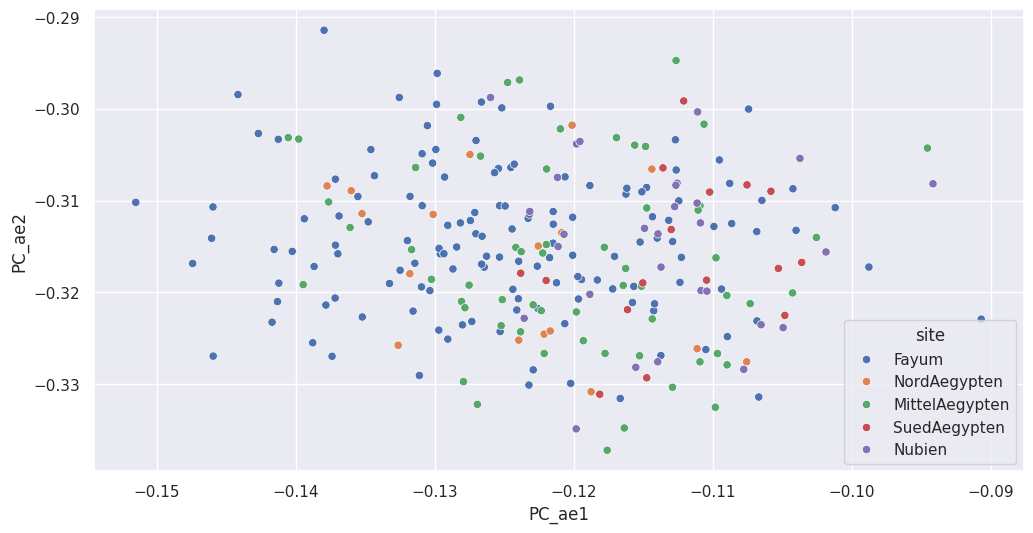

In [80]:
plt.figure(figsize=(12,6))
sns.scatterplot (data=codings_df, x='PC_ae1', y='PC_ae2', hue='site' )

COMMENT:

## Try to get most relevant components: Check the weights to get relationship original-new components:

In [81]:
type(autoencoder_pca.layers[0].trainable_weights)

list

In [82]:
autoencoder_pca.layers[0].trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(48, 22) dtype=float32, numpy=
 array([[ 0.23843181,  0.11171585, -0.1892413 , ..., -0.1820848 ,
          0.25438565,  0.1464352 ],
        [ 0.08612461,  0.31862745, -0.14360115, ..., -0.13019927,
          0.2042304 , -0.00055872],
        [-0.16342738, -0.32360744,  0.05240604, ...,  0.10246892,
          0.22680578,  0.13733688],
        ...,
        [ 0.05902107,  0.03564111, -0.02647974, ...,  0.05341811,
         -0.11667075,  0.14825124],
        [ 0.01958111, -0.14924118,  0.05096579, ...,  0.11552237,
          0.25267422, -0.05172803],
        [ 0.2836216 , -0.1599114 , -0.0623762 , ..., -0.24157175,
          0.24343915,  0.18940434]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(22,) dtype=float32, numpy=
 array([ 0.01200228, -0.03663063,  0.04360279, -0.01597109, -0.00804135,
         0.04402887,  0.03949   , -0.03688403,  0.00143649,  0.01459919,
         0.03618105, -0.03662366,  0.02508646, -0.05385294, -0.00753094,
       

In [83]:
autoencoder_pca.layers[0].trainable_weights[0].shape

TensorShape([48, 22])

In [84]:
# max value weights of layer 0:
np.max(autoencoder_pca.layers[0].trainable_weights[0])

0.3365362

In [85]:
# max value biases of layer 0:
np.max(autoencoder_pca.layers[0].trainable_weights[1])

0.044028867

### COMMENT: weights if first layer have shape [in_size, out_size]=[48,22]

In [86]:
w_l0 = pd.DataFrame(autoencoder_pca.layers[0].trainable_weights[0])
w_l0

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.238432,0.111716,-0.189241,0.230076,-0.079982,-0.019299,-0.242350,-0.207673,0.152316,-0.170936,...,-0.259580,0.048326,0.029094,-0.013304,0.280818,-0.188992,-0.222302,-0.182085,0.254386,0.146435
1,0.086125,0.318627,-0.143601,-0.255876,0.207763,0.232152,-0.019571,-0.132779,0.024164,-0.243333,...,0.064968,0.195476,-0.171142,-0.192833,-0.153817,0.249190,-0.291799,-0.130199,0.204230,-0.000559
2,-0.163427,-0.323607,0.052406,0.176516,-0.265066,0.177139,0.025880,-0.291835,0.044628,0.027097,...,-0.227052,-0.249246,0.255943,-0.234144,-0.240938,0.284146,-0.250207,0.102469,0.226806,0.137337
3,0.207306,-0.074173,0.267127,-0.101468,0.166551,0.057705,-0.257528,0.061736,0.106029,0.138506,...,-0.232460,-0.200810,0.023946,-0.113542,-0.245320,0.148681,-0.146297,0.287496,0.216362,0.288580
4,-0.188915,0.305123,-0.065556,0.069645,0.070226,-0.300607,-0.288766,0.203782,0.279754,0.130294,...,0.021136,0.255993,0.192852,-0.052597,-0.145151,-0.206955,-0.188730,0.167200,-0.101532,0.099537
5,-0.160779,0.118504,0.250325,-0.060459,0.265484,0.189801,0.179411,-0.170157,-0.249145,-0.023197,...,-0.178970,0.222320,-0.129288,-0.058410,0.128881,0.211361,0.136146,0.301836,0.259868,0.230520
6,0.181680,0.016419,-0.108840,-0.037181,0.110012,0.030123,-0.056352,0.128656,0.222371,-0.253994,...,0.141421,0.117614,0.117483,0.267895,-0.101529,-0.097182,-0.031652,-0.141387,-0.178255,0.074117
7,-0.134428,-0.192381,0.246087,-0.189468,-0.070264,-0.105411,0.057315,-0.193221,0.049395,-0.154262,...,0.053611,0.069760,-0.206433,-0.257334,0.100657,-0.092804,-0.088198,0.141569,-0.011382,-0.248459
8,0.234253,0.097500,0.305548,0.077924,0.089468,-0.001786,0.142503,-0.023392,0.248685,0.274458,...,0.180881,-0.194695,-0.203879,0.176282,-0.040870,0.234011,-0.164111,-0.167095,0.169793,-0.182638
9,0.099041,-0.094547,0.123151,-0.274542,0.052175,-0.136716,-0.201293,-0.156484,-0.290672,-0.260930,...,0.201273,-0.270944,0.022740,0.282914,-0.087656,0.138623,-0.034773,0.150173,-0.031929,-0.257410


### Comment: Unable to get most relevant components in the same way as for linear PCA analytical. Here an interesting link to probablistic PCA. Linear PCA is a special case of pPCA where some noise is infinitesimal small: https://www.tensorflow.org/probability/examples/Probabilistic_PCA

## Check reconstruction of input: that is in primarily the power of Autoencoder PCA

In [87]:
(W0, B0, W1, B1) = autoencoder_pca.get_weights()

In [88]:
print(W0.shape)
print(B0.shape)
print(W1.shape)
print(B1.shape)

(48, 22)
(22,)
(22, 48)
(48,)


In [89]:
reconstruction = autoencoder_pca.predict(dfcoor_m)

9/9 [==============================] - 0s 908us/step


In [90]:
print(reconstruction.shape)
print(type(reconstruction))

(264, 48)
<class 'numpy.ndarray'>


In [91]:
mse_aepca = mean_squared_error(dfcoor_m, reconstruction)
print(mse_aepca)

0.0001412372584917371


### make 2-D plots of input and reconstruction

In [92]:
landmks_x = []
landmks_y = []
landmks_z = []
for i in range (0,16): 
    #print(3*i+1)
    landmks_x.append(3*i)
    landmks_y.append(3*i+1)
    landmks_z.append(3*i+2)

In [93]:
print(landmks_x)
print(landmks_y)
print(landmks_z)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45]
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46]
[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47]


In [94]:
dfcoor_m.iloc[:,landmks_x]

,Glabella x,Nasion x,Nasospinale x,Prosthion x,Dacryon right x,Zygoorbitale right x,Frontomalare orb. R x,Infraorbital Foramen R x,Zygomaxillare R x,Alare R x,Dacryon L x,Zygoorbitale L x,Frontomalare orb. L x,Infraorbital Foramen L x,Zygomaxillare L x,Alare L x
0,0.0,0.0,0.0,0.0,0.068976,0.172216,0.340248,0.195637,0.318761,0.084331,-0.068976,-0.172216,-0.340248,-0.195637,-0.318761,-0.084331
1,0.0,0.0,0.0,0.0,0.060230,0.176092,0.339951,0.213250,0.315866,0.088645,-0.060230,-0.176092,-0.339951,-0.213250,-0.315866,-0.088645
2,0.0,0.0,0.0,0.0,0.063674,0.176471,0.333828,0.166024,0.320319,0.080500,-0.063674,-0.176471,-0.333828,-0.166024,-0.320319,-0.080500
3,0.0,0.0,0.0,0.0,0.061294,0.164845,0.319015,0.176241,0.328532,0.084797,-0.061294,-0.164845,-0.319015,-0.176241,-0.328532,-0.084797
4,0.0,0.0,0.0,0.0,0.084144,0.160736,0.345142,0.180477,0.329916,0.101245,-0.084144,-0.160736,-0.345142,-0.180477,-0.329916,-0.101245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.0,0.0,0.0,0.0,0.079908,0.205330,0.345345,0.199526,0.340265,0.098778,-0.079908,-0.205330,-0.345345,-0.199526,-0.340265,-0.098778
260,0.0,0.0,0.0,0.0,0.081229,0.215938,0.334488,0.184571,0.327636,0.086044,-0.081229,-0.215938,-0.334488,-0.184571,-0.327636,-0.086044
261,0.0,0.0,0.0,0.0,0.066931,0.204947,0.338665,0.203929,0.351294,0.086232,-0.066931,-0.204947,-0.338665,-0.203929,-0.351294,-0.086232
262,0.0,0.0,0.0,0.0,0.070361,0.192484,0.326791,0.203410,0.343417,0.100135,-0.070361,-0.192484,-0.326791,-0.203410,-0.343417,-0.100135


In [95]:
reconstruction[:,landmks_x]

array([[-1.97792165e-02,  3.64972278e-04, -1.75426900e-03, ...,
        -1.93089649e-01, -3.27030838e-01, -8.72558057e-02],
       [-6.26014033e-03,  1.63825136e-03, -6.51052967e-03, ...,
        -2.01708704e-01, -3.29904974e-01, -9.11613330e-02],
       [ 9.33846459e-05, -5.57214301e-03, -2.78183073e-03, ...,
        -1.80414721e-01, -3.27054650e-01, -9.29907039e-02],
       ...,
       [-9.45489574e-03,  1.14926435e-02,  4.17106226e-03, ...,
        -2.04357341e-01, -3.21803004e-01, -6.93074465e-02],
       [ 3.47628724e-03,  3.37219331e-03,  8.27024505e-03, ...,
        -1.97800681e-01, -3.34084243e-01, -8.62019584e-02],
       [-1.39494613e-03,  2.26549897e-03,  4.65295836e-03, ...,
        -1.92539573e-01, -3.29442352e-01, -8.96617845e-02]], dtype=float32)

Text(0, 0.5, 'Y')

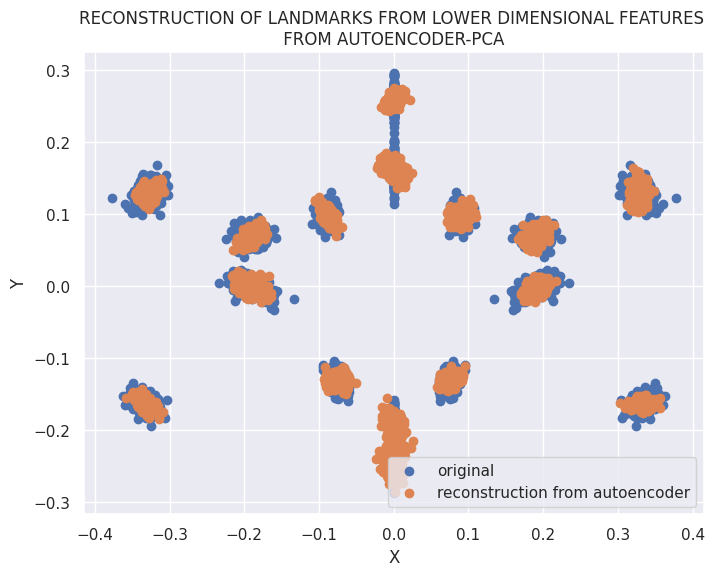

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(x=dfcoor_m.iloc[:,landmks_x], y=dfcoor_m.iloc[:,landmks_y])
plt.scatter(x=reconstruction[:,landmks_x], y=reconstruction[:,landmks_y])
plt.legend(['original','reconstruction from autoencoder'])
plt.title('RECONSTRUCTION OF LANDMARKS FROM LOWER DIMENSIONAL FEATURES \n FROM AUTOENCODER-PCA ')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Z')

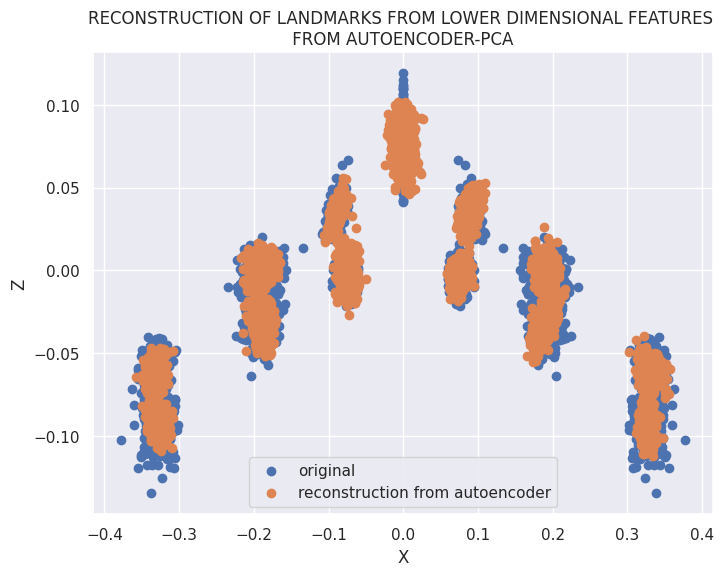

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(x=dfcoor_m.iloc[:,landmks_x], y=dfcoor_m.iloc[:,landmks_z])
plt.scatter(x=reconstruction[:,landmks_x], y=reconstruction[:,landmks_z])
plt.legend(['original','reconstruction from autoencoder'])
plt.title('RECONSTRUCTION OF LANDMARKS FROM LOWER DIMENSIONAL FEATURES \n FROM AUTOENCODER-PCA ')
plt.xlabel('X')
plt.ylabel('Z')

Text(0, 0.5, 'Y')

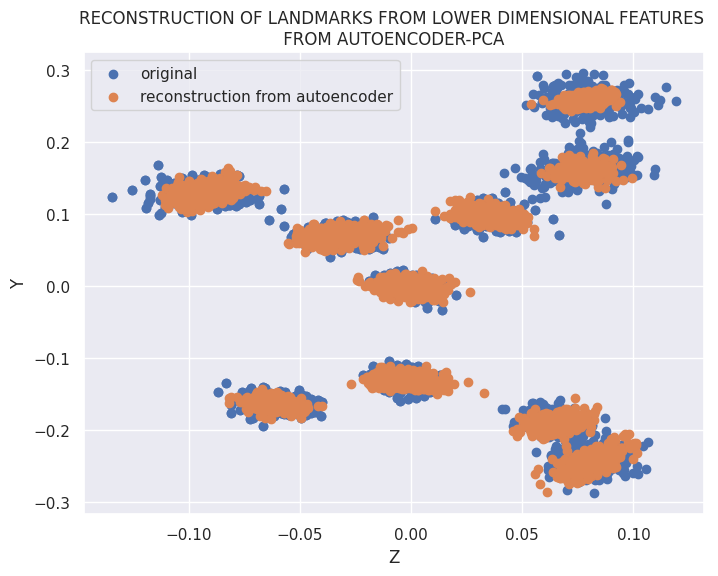

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(x=dfcoor_m.iloc[:,landmks_z], y=dfcoor_m.iloc[:,landmks_y])
plt.scatter(x=reconstruction[:,landmks_z], y=reconstruction[:,landmks_y])
plt.legend(['original','reconstruction from autoencoder'])
plt.title('RECONSTRUCTION OF LANDMARKS FROM LOWER DIMENSIONAL FEATURES \n FROM AUTOENCODER-PCA ')
plt.xlabel('Z')
plt.ylabel('Y')

# CONCLUSIONS

<p style=font-weight:700;font-size:14pt>
<ul style=font-weight:700;font-size:14pt>
<li>Analytical linear PCA is easy to interprete</li>
<li>Non-linear PCA and autoencoder based are not</li>
<li>Based on the codings of Autoencoder PCA the orignal data can be very well reconstructed: $MSE=1.41e-4$</li>
<li>Trying a deeper autoencoder as dimensionality-reductor probably will improve the reconstruction error</li>
<li>This can be done easily</li>

</ul>
</p>

# REFERENCES
<p style=font-weight:200;font-size:14pt>
[WELTE, 2016] Zeitzeugen aus dem Wüstensand. Die altägyptischen Mumienschädel aus Abusir el-Meleq. VML Verlag Marie Leidorf GmbH [Verlag] 	Eberhard Karls Universität Tübingen [Grad-verleihende Institution]
</p>

# ACKNOWLEDGEMENTS
<p style=font-weight:200;font-size:14pt>
Thanks to Ms. Dr. Welte for supplying the data set for this analysis.
</p>